In [1]:
import os
from utils.constants import (
    CUDA_VISIBLE_DEVICES
)
os.environ['CUDA_VISIBLE_DEVICES'] = CUDA_VISIBLE_DEVICES

import matplotlib.pyplot as plt
from pl_modules.DukePreMRI import DukePreMRI, get_feature

from utils.constants import (
    CMAP,
    NORM,
    PATCHES,
    DATASETS_PATH,
    TRAIN_RATIO,
    VAL_RATIO,
    TEST_RATIO
)

BATCH_SIZE = 4

In [2]:
datamodule = DukePreMRI(batch_size=BATCH_SIZE,
                        train_ratio = 0.75,
                        val_ratio = 0.25,
                        test_ratio = 0,
                        only_with_segmentation=True,
                        only_without_segmentation=False,
                        with_segmentation=True,
                        from_manufacturer='SIEMENS',
                        subset=0.1)

datamodule.prepare_data()
datamodule.setup(stage='fit')

Feature: "Manufacturer Model Name" has cases missing in the train set
Feature: "Scan Options" has cases missing in the train set


Loading dataset: 100%|██████████| 101/101 [00:02<00:00, 45.01it/s]


In [3]:
datamodule = DukePreMRI(batch_size=BATCH_SIZE,
                        train_ratio = 0.75,
                        val_ratio = 0.25,
                        test_ratio = 0,
                        only_with_segmentation=True,
                        only_without_segmentation=False,
                        with_segmentation=True,
                        from_manufacturer='SIEMENS',
                        subset=0.1)

datamodule.prepare_data()
datamodule.setup(stage='fit')

Feature: "Manufacturer Model Name" has cases missing in the train set
Feature: "Scan Options" has cases missing in the train set


Loading dataset: 100%|██████████| 101/101 [00:02<00:00, 44.48it/s]


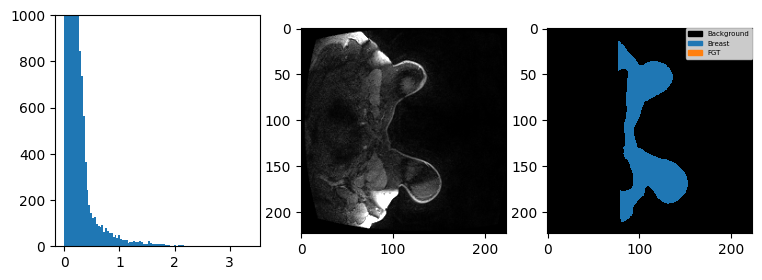

Manufacturer Model Name: Skyra
Scan Options: PFP\SFS
Field Strength (Tesla): 3.0
Flip Angle: 10.0
Slice Thickness: 1.2999999523162842
TE (Echo Time): 1.4399999380111694
TR (Repetition Time): 3.7700002193450928


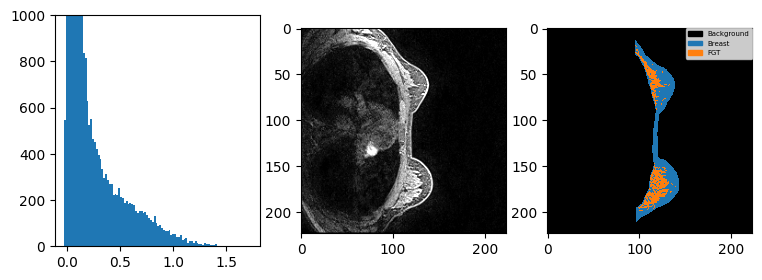

Manufacturer Model Name: TrioTim
Scan Options: PFP\SFS
Field Strength (Tesla): 3.0
Flip Angle: 10.0
Slice Thickness: 1.100000023841858
TE (Echo Time): 1.600000023841858
TR (Repetition Time): 4.089999675750732


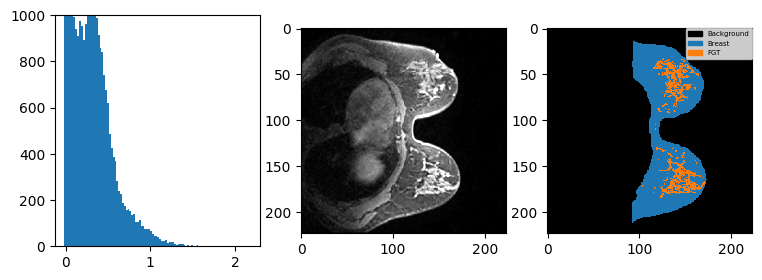

Manufacturer Model Name: Avanto
Scan Options: PFP\SFS
Field Strength (Tesla): 1.5
Flip Angle: 10.0
Slice Thickness: 1.100000023841858
TE (Echo Time): 1.5
TR (Repetition Time): 4.259999752044678


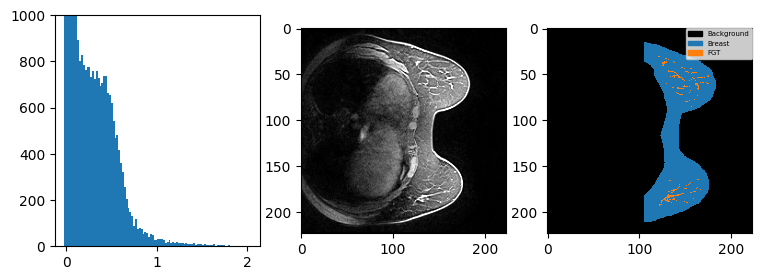

Manufacturer Model Name: TrioTim
Scan Options: PFP\SFS
Field Strength (Tesla): 3.0
Flip Angle: 10.0
Slice Thickness: 1.100000023841858
TE (Echo Time): 1.4399999380111694
TR (Repetition Time): 4.089999675750732


In [4]:
for _, batch in enumerate(datamodule.train_dataloader()):
    images,features = batch["image"],batch["features"]
    if datamodule.with_segmentation:
        segmentation = batch['segmentation']
    
    for i in range(images.shape[0]):
        plt.figure(figsize=(9, 3))
        plt.subplot(1, 3, 1)
        plt.hist(images[i, 0, :, :].flatten(), bins=100)
        plt.ylim([0,1000])
        plt.subplot(1, 3, 2)
        plt.imshow(images[i, 0, :, :], cmap='gray', vmin=0, vmax=1)

        if datamodule.with_segmentation:
            plt.subplot(1, 3, 3)
            plt.imshow(segmentation[i, 0, :, :], cmap = CMAP, norm=NORM, interpolation="none")
            plt.legend(handles=PATCHES, bbox_to_anchor=(1, 1), loc=1, borderaxespad=0, fontsize=5)
        plt.show()


        for feature_name in datamodule.features_names:
            feature = get_feature(features,
                                  feature_name,
                                  datamodule.features_dims,
                                  datamodule.features_scale,
                                  as_indices=True)[i].item()

            if feature_name in datamodule.features_labels.keys():
                print(f'{feature_name}: {datamodule.features_labels[feature_name][feature]}')
            else:   
                print(f'{feature_name}: {feature}')

    break